# Data Preprocessing

## Download data

Here, I dowanload dataset from my google drive. https://drive.google.com/uc?id=1KtCCP3Oot2ugg2BY2RWRyzV7j2J5UheC

## Read Dataset
I can read the dataset using pandas dataframe.

In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\amink\\Desktop\\Javad Kazemian\\Javad_NLP_Project'

In [3]:
full_data=pd.read_csv(r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\Full_Data.csv",encoding='utf-8')

In [4]:
full_data.head()

,text,sentiment,confidence
0,trying to wait a patient as i can lol,1,0.3
1,"Good morning Fotopro Team, I noticed in some ...",1,0.6
2,these still on track? ahead? behind?,1,0.2
3,any update on delivery?,1,0.0
4,product so nice had to get it twice,1,0.5


To get an idea about the statistics of my dataset I described it:

In [5]:
full_data.describe()

,sentiment,confidence
count,204058.000000,204058.000000
mean,0.708970,0.902525
std,0.454238,0.893052
min,0.000000,0.000000
25%,0.000000,0.300000
50%,1.000000,0.700000
75%,1.000000,1.300000
max,1.000000,22.299999


In [6]:
full_data.describe(include='all')

,text,sentiment,confidence
count,204058,204058.000000,204058.000000
unique,203717,NaN,NaN
top,So much vitriol... I just wanted to thank the ...,NaN,NaN
freq,2,NaN,NaN
mean,NaN,0.708970,0.902525
std,NaN,0.454238,0.893052
min,NaN,0.000000,0.000000
25%,NaN,0.000000,0.300000
50%,NaN,1.000000,0.700000
75%,NaN,1.000000,1.300000


There are three column in my dataset, first one is the comment text, second one is the sentiment of the comments (1 for positive comments and 0 for negative comments) 

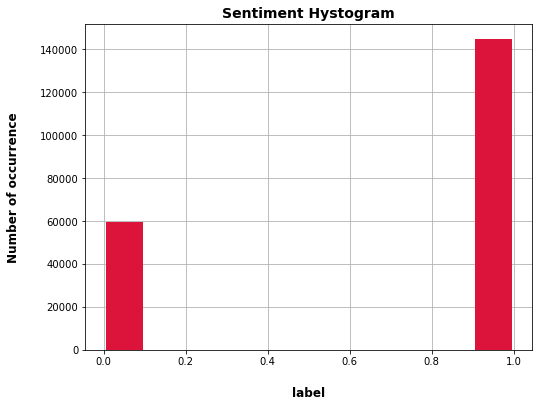

In [7]:
ax=full_data['sentiment'].hist(figsize=(8,6),color='#DC143C', zorder=2, rwidth=0.9);
ax.set_title("Sentiment Hystogram",weight='bold', size=14);
ax.set_xlabel("label", labelpad=20, weight='bold', size=12);
ax.set_ylabel("Number of occurrence", labelpad=20, weight='bold', size=12);

 I also plotted the distribution of confidence levels.

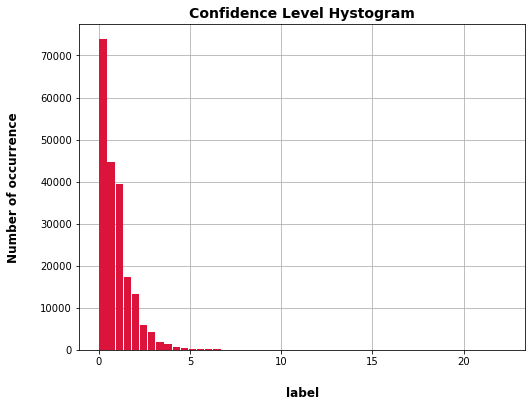

In [8]:
ax=full_data['confidence'].hist(bins=50,figsize=(8,6),color='#DC143C', zorder=2, rwidth=0.9);
ax.set_title("Confidence Level Hystogram",weight='bold', size=14);
ax.set_xlabel("label", labelpad=20, weight='bold', size=12);
ax.set_ylabel("Number of occurrence", labelpad=20, weight='bold', size=12);

## Data Cleaning

I have tried to perform text cleaning in different steps:
1. Convert emojis into text, 
2. Romove punctuations from text,
3. Lowercase all words, 
4. Remove all unnecessary texts(websites, emails),
5. Convert contractions into separate words,
6. Remove all digits from my text
7. Remove StopWords


In this step I will convert all emojis in my text into strings using the emoji package:

In [9]:
#!pip install emoji


In [10]:
import emoji

In [11]:
# Convert all emojis into text
full_data.iloc[:,0] = [ emoji.demojize(j) for j in full_data.iloc[:,0]]
full_data.iloc[:,0] = [ j.replace(":"," ") for j in full_data.iloc[:,0]]

###### explain this:

full_data.iloc[:,0] = [ ' '.join(j.split()) for j in full_data.iloc[:,0]]


Next I will remove all punctuations from text

In [12]:
import string
import re

In [13]:
table = str.maketrans(' ', ' ', string.punctuation)
full_data.iloc[:,0] = [j.translate(table) for j in full_data.iloc[:,0]]
full_data.iloc[:,0] = [j.replace('\x96',' ') for j in full_data.iloc[:,0]]

Now, I convert all words to lowercase letters

In [14]:
full_data.iloc[:,0] = [j.lower() for j in full_data.iloc[:,0]]

Here, I will remove all unnecessary texts such as websites emails etc.

In [15]:
full_data.iloc[:,0] = [re.sub(r'http\S+|http\s+|https\S+|https\s+|www\S+|www\s+|@\S+|@\s', '',j) for j in full_data.iloc[:,0]]

After this step, I convert all contractions into separate words. (Contraction like don't --->do not, sth --> something, 
u --> you)
using pycontractions package:

In [16]:
#!pip install contractions
# Both the same installation
#import sys  
#!{sys.executable} -m pip install contractions

In [17]:
#!apt install openjdk-8-jdk

In [18]:
#!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

In [19]:
#!pip install language-check

In [20]:
import contractions

In [21]:
full_data.iloc[:,0] = list(contractions.fix(j) for j in full_data.iloc[:,0])

Then, I remove all digits from my text.

In [22]:
table = str.maketrans(' ', ' ', string.digits)
full_data.iloc[:,0] = [j.translate(table) for j in full_data.iloc[:,0]]

As the last step of cleaning process, I remove double spaces from my text.

In [23]:
full_data.iloc[:,0] = [" ".join(j.split()) for j in full_data.iloc[:,0]]

Now, I can take a look at the cleaned text:

In [24]:
full_data.head()

,text,sentiment,confidence
0,trying to wait a patient as i can lol,1,0.3
1,good morning fotopro team i noticed in some of...,1,0.6
2,these still on track ahead behind,1,0.2
3,any update on delivery,1,0.0
4,product so nice had to get it twice,1,0.5


### StopWords
Since stopword are ususally most frequent words in every datset I remove them from my statistical analysis:

In [25]:
temp=pd.DataFrame(full_data)
# Remove stopwords from the text
from wordcloud import STOPWORDS
stopwords=set(STOPWORDS)

In [26]:
len(STOPWORDS)

192

In [27]:
print(sorted(list(stopwords)))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 

In [28]:
stopwords = ['i', 'hi', 'oh', 'hello','this', 'that','will','I','us'] + list(STOPWORDS)
len(stopwords)

201

In [29]:
'''
from sklearn.feature_extraction import text
sklearn_stopwords = text.ENGLISH_STOP_WORDS
len(sklearn_stopwords)
'''

'\nfrom sklearn.feature_extraction import text\nsklearn_stopwords = text.ENGLISH_STOP_WORDS\nlen(sklearn_stopwords)\n'

In [30]:
# print(sorted(list(sklearn_stopwords)))

In [31]:
#'''
#from nltk.corpus import stopwords
#nltk_stopwords = stopwords.words('english')
#len(nltk_stopwords)
#''''''

In [32]:
#print(sorted(list(nltk_stopwords)))

In [33]:
for i,j in enumerate(temp['text']):
    querywords = j.split()
    resultwords  = [word for word in querywords if word not in stopwords]
    result = ' '.join(resultwords)
    # .at() similar to .loc()
    temp.at[i, 'text'] = result

In [34]:
from collections import Counter

c_text = " ".join(j for j in temp['text'])
count = Counter(c_text.split())

# value_counts()
frequent_words= pd.DataFrame(count.most_common(40))

## Data Statistics

In this step I will try to get some basic statistics of my dataset:
The histograms of sentments and confidence level is already plotted. 
Here I will get the statistics of my text:

In [35]:
frequent_words

,0,1
0,thanks,25129
1,please,20698
2,received,20409
3,update,19483
4,one,18583
5,still,16869
6,now,15008
7,thank,14948
8,shipping,14183
9,got,13194


In [36]:
frequent_words.to_csv('frequentwords')

### WordCloud

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400,max_font_size=100, max_words=200,collocations=False, 
                      background_color="white").generate_from_frequencies(count)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# **kwargs: pass keyworded variable length of arguments 

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    
    return("hsl(10,50%%, %d%%)" % np.random.randint(49,51))    

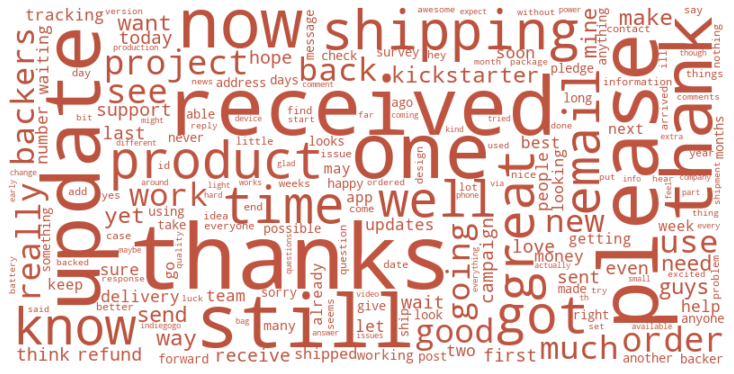

In [40]:
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [41]:
full_data.describe(include='all')

,text,sentiment,confidence
count,204058,204058.000000,204058.000000
unique,198474,NaN,NaN
top,,NaN,NaN
freq,160,NaN,NaN
mean,NaN,0.708970,0.902525
std,NaN,0.454238,0.893052
min,NaN,0.000000,0.000000
25%,NaN,0.000000,0.300000
50%,NaN,1.000000,0.700000
75%,NaN,1.000000,1.300000


### Word Distribution
I can also take a look at the distribution of my sentences in the entire set to easlily count the length of each sentence.

In [42]:
wordDist = [len(w.split()) for w in full_data.iloc[:,0]]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist), 2)))
print('Max words: ' + str(np.max(wordDist)))

Avg. no of words: 14.45
Std. deviation: 13.41
Max words: 626


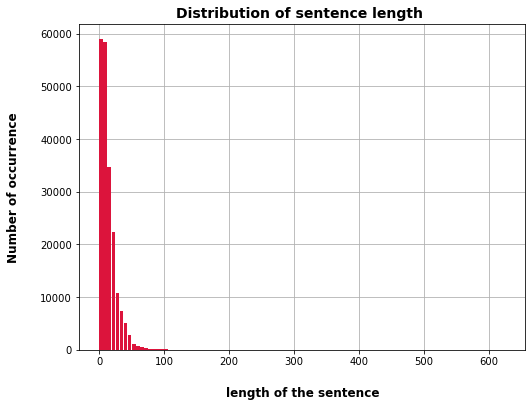

In [43]:
ax=plt.figure(figsize=(8,6))
ax=plt.hist(wordDist,bins=100,color='#DC143C', zorder=2, rwidth=0.9);
plt.title("Distribution of sentence length ",weight='bold', size=14);
plt.xlabel("length of the sentence", labelpad=20, weight='bold', size=12);
plt.ylabel("Number of occurrence", labelpad=20, weight='bold', size=12);
plt.grid(True)
plt.show()

# Embedding

 Associating the vectors with the labels is called an embedding

In [44]:
# tensorflow_version 2.x

import tensorflow as tf
import tensorflow.keras as keras


In [45]:
import os
import codecs

#### Tokenizer
in the next step I will use Tokenizer function to tokenize my text.

Tokenizer generates a dictionary of every word in my documnet in order to take the embedding vector of each word.

In [46]:
# Creates tokenizer model

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer() 

In [47]:
#fit the tokenizer (creating list of word:value of all words)

tokenizer.fit_on_texts(full_data.iloc[:,0]) 

# Get words from cleaned text

cleaned_words = list(tokenizer.word_index.keys())
cleaned_words

['thanks',
 'please',
 'received',
 'update',
 'one',
 'still',
 'now',
 'thank',
 'shipping',
 'got',
 'know',
 'great',
 'product',
 'time',
 'well',
 'email',
 'project',
 'order',
 'see',
 'good',
 'really',
 'work',
 'back',
 'much',
 'use',
 'backers',
 'new',
 'going',
 'kickstarter',
 'yet',
 'make',
 'way',
 'want',
 'send',
 'mine',
 'need',
 'guys',
 'support',
 'love',
 'sent',
 'refund',
 'hope',
 'last',
 'first',
 'today',
 'receive',
 'even',
 'wait',
 'campaign',
 'think',
 'tracking',
 'soon',
 'let',
 'updates',
 'number',
 'delivery',
 'best',
 'waiting',
 'help',
 'people',
 'two',
 'money',
 'sure',
 'team',
 'shipped',
 'go',
 'looking',
 'getting',
 'week',
 'app',
 'keep',
 'next',
 'may',
 'already',
 'working',
 'many',
 'possible',
 'happy',
 'another',
 'address',
 'never',
 'look',
 'ship',
 'able',
 'sorry',
 'right',
 'ago',
 'forward',
 'long',
 'something',
 'looks',
 'give',
 'using',
 'anything',
 'message',
 'days',
 'take',
 'backer',
 'pledge',
 '

In [48]:
# Write TSV file:
file = codecs.open('text_data.tsv', "w", "utf-8")

for item in cleaned_words:
    file.write("%s\r\n" % item)
file.close()

In [49]:
# Write CSV file:
file = codecs.open('text_data.csv', "w", "utf-8")

for item in cleaned_words:
    file.write("%s\r\n" % item)
file.close()


In [50]:
# load saved csv or tsv file into jupyter:

path0= r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\text_data.tsv"
text_data= pd.read_csv(path0)

path= r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\text_data.csv"
text_data= pd.read_csv(path)

In [51]:
l= pd.read_csv(path)
l

,thanks
0,please
1,received
2,update
3,one
4,still
...,...
97968,turret
97969,basicaly
97970,partsboardsetc
97971,matrixwriter


In [52]:
# dataframe to list
l.iloc[:,0]

0                please
1              received
2                update
3                   one
4                 still
              ...      
97968            turret
97969          basicaly
97970    partsboardsetc
97971      matrixwriter
97972          makerfan
Name: thanks, Length: 97973, dtype: object

### FASTTEXT Embedding
 
 

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.
In this study, I am giong to use two separate embeddings for my text. Word embeddings approch is one of the key breakthroughs of deep learning on challenging natural language processing problems. Two different word embedding methods called word2vec by researchers at Google and GloVe by researchers at Stanford.

three techniques that can be used to learn a word embedding from text data:
1. Embedding Layer
2. Word2Vec
3. GloVe
FastText is an extension to Word2Vec proposed by Facebook in 2016.
First, I will use facebook's fasttext and then I will use Stanford's Glove for embedding of my dataset.
For fasttext embedding I download the fasttext code. 

In [ ]:
#get fastText from: https://github.com/facebookresearch/fastText/archive/v0.9.1.zip

In [ ]:
#pip install --upgrade gensim

In [53]:
from gensim.models import Word2Vec
model1 = Word2Vec(sentences=str(text_data.iloc[:,0]), window=5, min_count=5, workers=4, sg=0) # sg:0 (CBOW) 
#continuous bag of words (CBOW) and skip grams


In [54]:
from gensim.models import FastText
#from gensim.models.fasttext import FastText
model2 = FastText(str(text_data.iloc[:,0]), window=5, min_count=5, workers=4,sg=1) # sg:1 (skip gram)

In [55]:
# saving model
model1.wv.save_word2vec_format('model1.bin')

In [56]:
model1.wv.save_word2vec_format('model1.txt', binary=False)

### pretrained fasttext
For this project I used a pre-trained fasttext model. Here, I download the pretrained model of fasttext which has been trained on crawl data set with its subword.

#### get it from:   https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

In [57]:
# Now, I can apply the dowloaded model (fastText-0.9.1/crawl-300d-2M-subword.bin) on my tokenized words (text_data).

path3=r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\fastText-0.9.1\crawl-300d-2M-subword\crawl-300d-2M-subword.bin"

path4=r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\fastText-0.9.1\crawl-300d-2M-subword\crawl-300d-2M-subword.vec"

fastText-0.9.1/fasttext print-sentence-vectors fastText-0.9.1/crawl-300d-2M-subword.bin < text_data.csv > text_data.tsv

In [ ]:
#
#
#
#.bin file
from gensim.models.fasttext import load_facebook_model
#model3= load_facebook_model(path3)

In [ ]:
#
#
#
#.vec file
from gensim.models import KeyedVectors
#model4 = KeyedVectors.load_word2vec_format(path4, binary=False)

In [ ]:
#model4.similarity('king','queen')

In [ ]:
#model4.similarity('king','man')

###  Embdded version of my tokenized dictionary (text_data.tsv)



Here, I will save the embbded version of the words in my dataset in a file (.tsv) and separate each value  with ",".

Then I added a first line as the header of the file and saved it as csv format

In [58]:
import os

firstLine = ','.join(['D'+str(i) for i in np.arange(1, 301)]) + '\n'

with open('text_data.tsv', 'r',encoding='utf8') as original: 
      data = original.read()

with open('cleaned_token_data.csv', 'w',encoding='utf8') as modified: 
      modified.write(firstLine + data)


Now, I can read the embdded version of my tokenized dictionary

In [59]:
Embeddings_FT = pd.read_csv('cleaned_token_data.csv', sep=',', decimal = '.',low_memory = True, index_col = False)

Embeddings_FT.describe()

,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this step I created a dictionary of all words in my dataset (cleaned Full Text (FT)) with their pretrained values:

In [60]:
EmbeddingsDict_FT = dict(zip(cleaned_words, Embeddings_FT.values))

Here, I create the embedding matrix of all sentences in my dataset.

# Padding
Based on the distribution of sentence length, I decided to only keep the senences up to 200 words.
Here I will use a tensorflow package to create zeros at the end of smaller length sentences. I used post padding to add all zeros to the end of each sentence. 

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
sequences = tokenizer.texts_to_sequences(full_data.iloc[:,0]) # Create the sequences.

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=200,padding = 'post') 

Found 97974 unique tokens.


### zeros
First create matrix full with 0's

In [63]:
embedding_matrix_FT = np.zeros((len(word_index) + 1, 300))

### Generate embeddings matrix

### Target variable
I have every thing ready for the next step, except for the target variable. I will select both confidence and sentiment values to be my objective variable, but I will keep them separate for now.

In [64]:
# Creates the objective function

labels1 = full_data.iloc[:,1] # Sentiment column
labels2 = full_data.iloc[:,2]   # confidance column

In [65]:
print('Shape of data tensor:', data.shape)
print('Shape of label 1 tensor:', labels1.shape)
print('Shape of label 2 tensor:', labels2.shape)

Shape of data tensor: (204058, 200)
Shape of label 1 tensor: (204058,)
Shape of label 2 tensor: (204058,)


After all these steps I will save all my outputs (as numpy arrays), so that I can use them afterwards without going through above steps. 


### Save on a drive

In [ ]:
# Save outputs
!mkdir FT_Preprocessed
np.savetxt("FT_Preprocessed/FT_Padded.txt", data)
np.savetxt("FT_Preprocessed/FT_Labels1.txt", labels1)
np.savetxt("FT_Preprocessed/FT_Labels2.txt", labels2)
np.savetxt("FT_Preprocessed/FT_EmbeddingMatrix.txt", embedding_matrix_FT)

Compress the file to upload on Google drive for later usage.

In [ ]:
#!zip FT_Preprocessed.zip

### GLOVE Embedding

As the second embedding, I just used the pretraind model of glove which has been trained on Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download).
https://nlp.stanford.edu/projects/glove/

Download it from here: Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip

In [66]:
path6 = r"C:\Users\amink\Desktop\Javad Kazemian\Javad_NLP_Project\fastText-0.9.1\glove.42B.300d\glove.42B.300d.txt"
# file = open(path6, encoding="utf8") # must be closed after use otherwise use 'with open()''

After downloading the pretrained Glove model I apply it on my tokenized words. glove model files (.txt) are in a word - vector format


In [ ]:
'''
import pandas as pd

df = pd.read_csv(path4, sep=" ", quoting=3, header=None, index_col=0)
glove = {key: val.values for key, val in df.T.items()}

'''

In [67]:
#Glove embedding on my dataset (Tokenized words)
embeddings_index = {}
with open(path6, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        # key= word, value= coef
        embeddings_index[word] = coefs

In [68]:
f

<_io.TextIOWrapper name='C:\\Users\\amink\\Desktop\\Javad Kazemian\\Javad_NLP_Project\\fastText-0.9.1\\glove.42B.300d\\glove.42B.300d.txt' mode='r' encoding='utf8'>

In [69]:
word

'þi'

In [70]:
coefs

array([-0.11969  ,  0.1602   , -0.24917  ,  0.12878  , -0.19874  ,
        0.44684  ,  0.43726  , -0.1943   ,  0.013091 ,  0.043389 ,
       -0.14589  , -0.35991  , -0.034873 , -0.44344  , -0.13404  ,
       -0.096952 ,  0.20621  , -0.1439   , -0.0033411,  0.23557  ,
       -0.01134  , -0.080737 , -0.056891 , -0.12781  ,  0.43218  ,
        0.0090635,  0.035958 ,  0.070213 ,  0.14113  ,  0.11309  ,
        0.14787  ,  0.22466  , -0.082153 ,  0.097319 , -0.21206  ,
       -0.25644  ,  0.04528  ,  0.24203  , -0.24572  ,  0.16853  ,
       -0.2641   ,  0.16425  ,  0.18171  , -0.050493 , -0.20969  ,
       -0.043564 , -0.043627 , -0.038104 , -0.0090871, -0.39152  ,
        0.083001 , -0.12174  ,  0.22382  , -0.17588  , -0.11067  ,
       -0.013021 , -0.3337   , -0.10227  , -0.03196  ,  0.28049  ,
       -0.073983 ,  0.22665  ,  0.082655 ,  0.16785  , -0.24602  ,
       -0.040421 , -0.023705 , -0.012314 ,  0.16754  ,  0.17192  ,
       -0.2625   , -0.18317  , -0.26723  ,  0.0673   ,  0.0641

In [71]:
# Generate embeddings matrix
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_FT[i] = embedding_vector     
        

In [72]:
GL_EMBEDDING_DIM = 300
embedding_matrix_GL = np.zeros((len(word_index) + 1, GL_EMBEDDING_DIM))

# Generate embeddings matrix
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_GL[i] = embedding_vector

### Save on a drive


After creating the embedding matrix for glove, I save all the requirements for later usage

In [ ]:
!mkdir GL_Preprocessed
np.savetxt("GL_Preprocessed/GL_Padded.txt", data)
np.savetxt("GL_Preprocessed/GL_Labels1.txt", labels1)
np.savetxt("GL_Preprocessed/GL_Labels2.txt", labels2)
np.savetxt("GL_Preprocessed/GL_EmbeddingMatrix.txt", embedding_matrix_GL)

In [ ]:
#!zip -r GL_Preprocessed.zip GL_Preprocessed 

In [ ]:
# Download files
#from google.colab import files
#files.download("GL_Preprocessed.zip")

# CNN Model 

In this part of the study, I will training two different models using the fasttext embedding.

## Using Fasttext embedding

Here I download the my dataset from the saved files.

In [ ]:
#!gdown 'https://drive.google.com/uc?id=1hodalI3DOLgnjTFfOketSQNHy-6WsUfx';
#!unzip FT_Preprocessed.zip

Reading the embedding matrix, dataset and labels.

In [73]:
import numpy as np

In [ ]:
# Read word embeddings
embedding_matrix_FT = np.genfromtxt('FT_Preprocessed/FT_EmbeddingMatrix.txt')

# Read the padded text sequences. Uses numpy function that loads from a previously saved txt.
data = np.genfromtxt('FT_Preprocessed/FT_Padded.txt')
labels1 = np.genfromtxt('FT_Preprocessed/FT_Labels1.txt')
labels2 = np.genfromtxt('FT_Preprocessed/FT_Labels2.txt')

In this course work as stated above we have a confidence level for each sentiment.

I have decided to use two separate methods to train my model:

 1- Training the model based on high confidence sentiment (Removing sentiments with low confidence)

 2- Using a five category for confidence and try to training a categorical model for different connfidence levels. 

### Using high confidence levels

In this part I will separate my data set into train and test sets then I will remove the low confidence level sentiments from my train set.
But I will apply the model on all confidence levels in my test set.

**Separating test and train sets.**

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test,y_ct,y_cs = train_test_split(data, labels1,labels2, test_size=0.25,
                                                    random_state=250500683, 
                                                    stratify = labels1)

Removing low confidence levels from the train set.

In [76]:
X_train = X_train[np.logical_not(y_ct[:] <= 0.2)]
y_train = y_train[np.logical_not(y_ct[:] <= 0.2)]

In [77]:
X_train.shape

(125554, 200)

In [78]:
y_train.shape

(125554,)

####  KIM's Model     (Kim architecture)

Finally using the tensorflow I will create the first Model (KIM)

In [79]:
from tensorflow.keras.models import Sequential, Model

In [80]:
from tensorflow.keras.layers import *

In [81]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.datasets import make_circles

In [83]:
#encoder = tf.keras.Model(input_vector, encoded, name="encoder")
#decoder = tf.keras.Model(input_encoded, decoded, name="decoder")
#autoencoder = tf.keras.Model(input_vector, decoder(encoder(input_vector)), name="autoencoder")


In [84]:
# Filter sizes to use.
filter_sizes = (2,4,6,8,10)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(200, 300))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=200 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 300)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 199, 128)     76928       ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 197, 128)     153728      ['input_1[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 195, 128)     230528      ['input_1[0][0]']                
                                                                                         

In [85]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline


In [86]:
#!pip install pydot

In [87]:
#You must install pydot (`pip install pydot`) and install graphviz 
#(see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.

#pip install graphviz

In [100]:
#plot_model(graph, show_shapes=True, show_layer_names=True,to_file='GraphModel.png')
#Image(retina=True, filename='GraphModel.png')

In [89]:
from tensorflow.keras import optimizers

# Final model
model = Sequential()
embedding_layer = Embedding(len(embedding_matrix_FT),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_FT],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

# Now we add our graph model
model.add(graph)
model.add(Dropout(0.5))

# Add a few layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# optimizer=optimizers.Adam(learning_rate=0.00001),
#adam = Adam(clipnorm=.1)
sgd = optimizers.SGD(learning_rate=0.05, clipnorm=1.) # Stochastic gradient descent (SGD)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [90]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline



In [99]:
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
#Image(retina=True, filename='model.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [92]:
model.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=256, callbacks=[early_stop])

Epoch 1/30
329/329 [==============================] - 423s 1s/step - loss: 0.5868 - acc: 0.6888 - val_loss: 0.4775 - val_acc: 0.7812
Epoch 2/30
329/329 [==============================] - 437s 1s/step - loss: 0.4681 - acc: 0.7666 - val_loss: 0.4107 - val_acc: 0.8075
Epoch 3/30
329/329 [==============================] - 421s 1s/step - loss: 0.4284 - acc: 0.7932 - val_loss: 0.3912 - val_acc: 0.8188
Epoch 4/30
329/329 [==============================] - 406s 1s/step - loss: 0.4094 - acc: 0.8057 - val_loss: 0.3859 - val_acc: 0.8187
Epoch 5/30
329/329 [==============================] - 405s 1s/step - loss: 0.3926 - acc: 0.8159 - val_loss: 0.3751 - val_acc: 0.8261
Epoch 6/30
329/329 [==============================] - 409s 1s/step - loss: 0.3803 - acc: 0.8226 - val_loss: 0.3699 - val_acc: 0.8282
Epoch 7/30
329/329 [==============================] - 442s 1s/step - loss: 0.3719 - acc: 0.8283 - val_loss: 0.3640 - val_acc: 0.8306
Epoch 8/30
329/329 [==============================] - 419s 1s/step - 

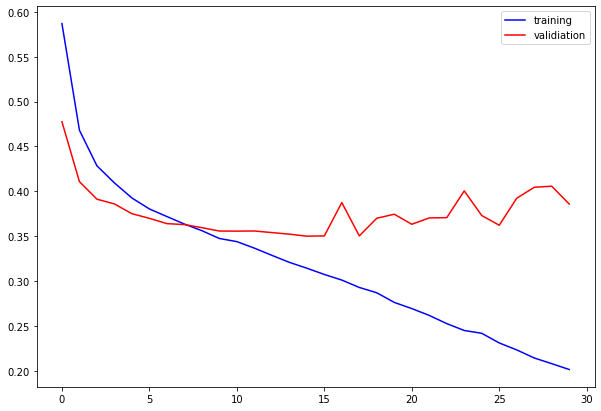

In [93]:
plt.figure(figsize=(10,7))
plt.plot(model.history.history['loss'],'b',label='training')
plt.plot(model.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()


In [94]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns


In [95]:
# Calculate outputs in test set
prob_test = model.predict(X_test, verbose = 1)
prob_train = model.predict(X_train, verbose = 1)

3924/3924 [==============================] - 209s 53ms/step


In [96]:
#y_new=model.predict_classes(X_test, verbose = 1) # old

predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis=1)


In [97]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)   # Confusion Matric(TPR,FPR,FNR,TNR), Precision, Recall, F1-Score
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)


AUC train:  0.9702230474643794


In [98]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

#sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        ##rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


AUC test:  0.8841435545684764


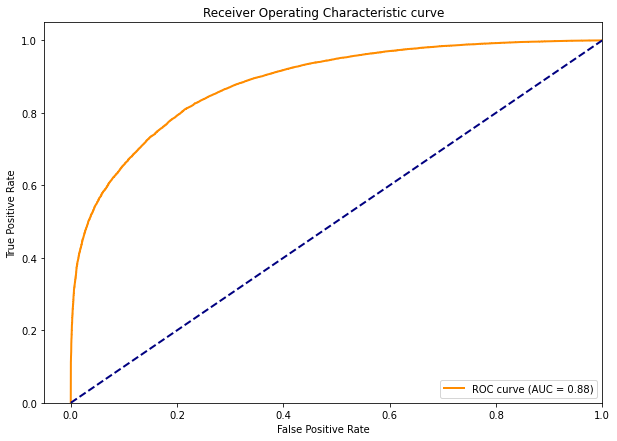

In [101]:
lw = 2
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [102]:
from sklearn.metrics import confusion_matrix
import pandas as pd
conf_mat = confusion_matrix(y_test, y_new)


In [103]:
# Turn matrix to percentages
confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xg, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

[Text(0.5, 0, 'good'), Text(1.5, 0, 'bad')]

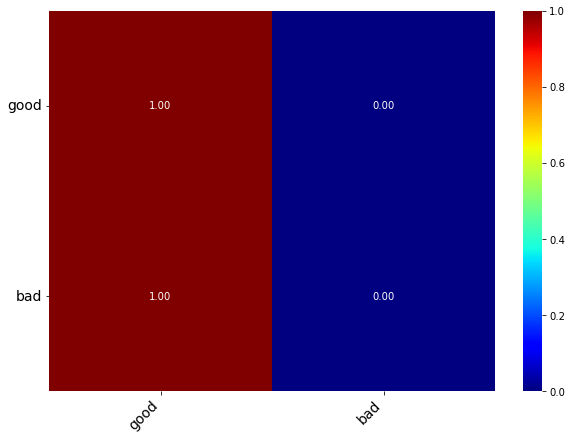

In [104]:
# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f',cmap ='jet')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)


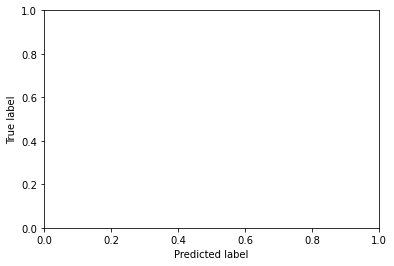

0.2910320493972361
51015
[[14847     0]
 [36168     0]]


In [105]:
# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()
print((conf_mat[1,1]+conf_mat[0,0])/(conf_mat.sum()))
print(conf_mat.sum())
print(conf_mat)

#### J_MODEL

In [106]:
J_model = Sequential()
embedding_layer = Embedding(len(embedding_matrix_FT),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_FT],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

J_model.add(embedding_layer)
J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=2,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )
J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=4,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1))  

J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=6,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1) ) 


J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=8,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)  )

J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=10,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)  )
J_model.add(MaxPooling1D(pool_size = 3))
# Flatten
J_model.add(Flatten())


# Dense Layer of size 128 with Dropout
J_model.add(Dense(128, activation = 'relu'))
J_model.add(Dropout(0.5))

# Output layer of size 1
J_model.add(Dense(1, activation = 'sigmoid'))
J_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          29392500  
                                                                 
 conv1d_5 (Conv1D)           (None, 199, 128)          76928     
                                                                 
 conv1d_6 (Conv1D)           (None, 196, 128)          65664     
                                                                 
 conv1d_7 (Conv1D)           (None, 191, 128)          98432     
                                                                 
 conv1d_8 (Conv1D)           (None, 184, 128)          131200    
                                                                 
 conv1d_9 (Conv1D)           (None, 175, 128)          163968    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 58, 128)         

In [107]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate=0.05, clipnorm=1.)
J_model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [108]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

In [109]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [111]:
#plot_model(J_model, show_shapes=True, show_layer_names=True), to_file='model.png')
#Image(retina=True, filename='model.png')

SyntaxError: cannot assign to function call (Temp/ipykernel_11500/2990336892.py, line 1)

In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [113]:
J_model.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=256, callbacks=[early_stop])

Epoch 1/30
329/329 [==============================] - 297s 899ms/step - loss: 0.6356 - acc: 0.6695 - val_loss: 0.6274 - val_acc: 0.6683
Epoch 2/30
329/329 [==============================] - 294s 893ms/step - loss: 0.5703 - acc: 0.6971 - val_loss: 0.4989 - val_acc: 0.7518
Epoch 3/30
329/329 [==============================] - 292s 889ms/step - loss: 0.4655 - acc: 0.7727 - val_loss: 0.4148 - val_acc: 0.8049
Epoch 4/30
329/329 [==============================] - 293s 890ms/step - loss: 0.4186 - acc: 0.8019 - val_loss: 0.4209 - val_acc: 0.8032
Epoch 5/30
329/329 [==============================] - 293s 890ms/step - loss: 0.3928 - acc: 0.8172 - val_loss: 0.3834 - val_acc: 0.8168
Epoch 6/30
329/329 [==============================] - 292s 887ms/step - loss: 0.3767 - acc: 0.8252 - val_loss: 0.3781 - val_acc: 0.8252
Epoch 7/30
329/329 [==============================] - 292s 888ms/step - loss: 0.3712 - acc: 0.8292 - val_loss: 0.3967 - val_acc: 0.8127
Epoch 8/30
329/329 [============================

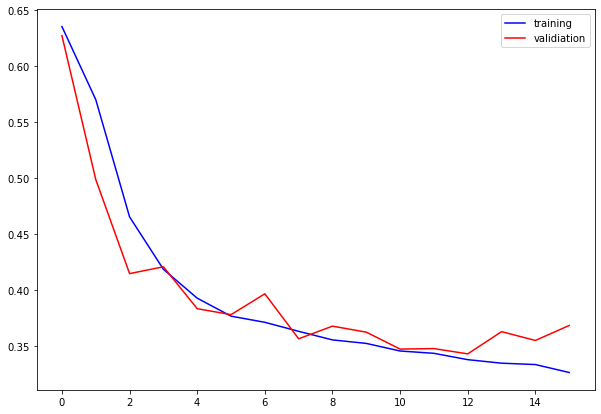

In [114]:
# Plot history
plt.figure(figsize=(10,7))
plt.plot(J_model.history.history['loss'],'b',label='training')
plt.plot(J_model.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import roc_curve, auc


In [116]:
# Calculate outputs in test set
prob_test = J_model.predict(X_test, verbose = 1)
prob_train = J_model.predict(X_train, verbose = 1)

3924/3924 [==============================] - 110s 28ms/step


In [117]:
#y_new=J_model.predict_classes(X_test, verbose = 1)

predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis=1)


In [118]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)


AUC train:  0.9267784997023683


In [119]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

AUC test:  0.8889678359687601


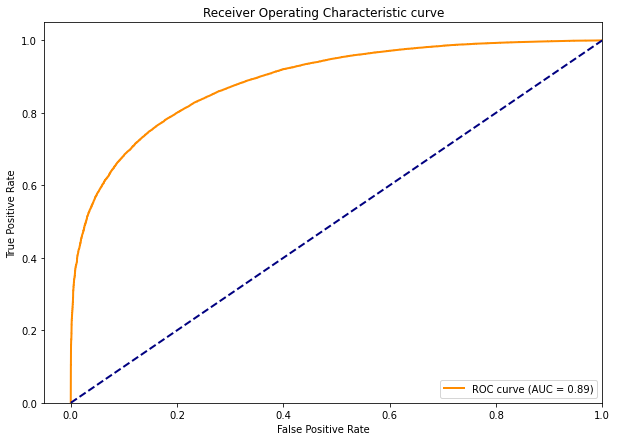

In [120]:
#sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
 # rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [121]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_new)


In [260]:
# Turn matrix to percentages
confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
                     confusion_matrix_xg, 
                     index=['good', 'bad'], 
                     columns=['good', 'bad'] 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

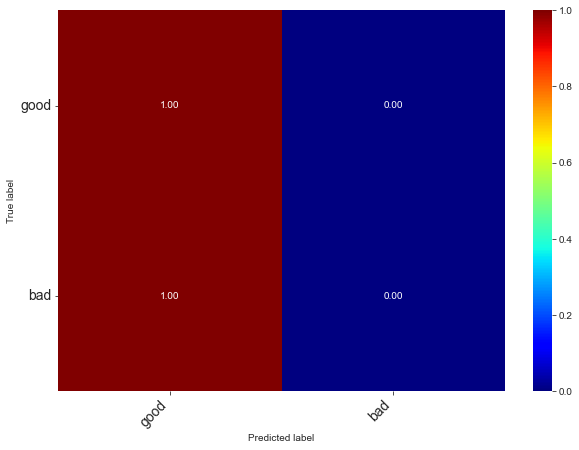

0.2910320493972361
51015
[[14847     0]
 [36168     0]]


In [259]:
# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f',cmap ='jet') #fmt: format basic strings

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()
print((conf_mat[1,1]+conf_mat[0,0])/(conf_mat.sum()))
print(conf_mat.sum())
print(conf_mat)

#### Classification model using Kim architecture


In [123]:
import numpy as np
full_data['intensity'] = full_data['sentiment']*2-1
full_data['classify'] = full_data['intensity']*full_data['confidence']

<AxesSubplot:>

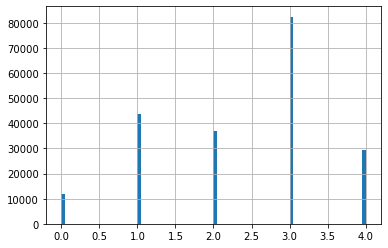

In [124]:
def classification(Y):
  if (Y <= -1.5):
    out = 0
  elif (-1.5<Y) and (Y<=-.2):
    out = 1
  elif (-.2<Y) and (Y<.2):
    out = 2
  elif (.2<=Y) and (Y<1.5):
    out = 3
  else: 
    out = 4
  return(out)
full_data['class'] = full_data['classify'].apply(lambda x: classification(x))
full_data['class'].hist(bins=80)

In [125]:
label_c=np.array(full_data['class'])

In [126]:
label_c

array([3, 3, 3, ..., 3, 4, 3], dtype=int64)

In [127]:
X_train, X_test, y_train1, y_test1 = train_test_split(data, label_c, test_size=0.33,
                                                    random_state=250500683, 
                                                    stratify = label_c)

In [128]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test1,5)
y_train = to_categorical(y_train1,5)


In [129]:
# Filter sizes to use.
filter_sizes = (2,4,6,8,10)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(200, 300))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=200 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 300)]   0           []                               
                                                                                                  
 conv1d_10 (Conv1D)             (None, 199, 128)     76928       ['input_2[0][0]']                
                                                                                                  
 conv1d_11 (Conv1D)             (None, 197, 128)     153728      ['input_2[0][0]']                
                                                                                                  
 conv1d_12 (Conv1D)             (None, 195, 128)     230528      ['input_2[0][0]']                
                                                                                         

In [130]:
from tensorflow.keras import optimizers

# Final model
model_c = Sequential()
embedding_layer = Embedding(len(embedding_matrix_FT),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_FT],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model_c.add(embedding_layer)

# Now we add our graph model
model_c.add(graph)
model_c.add(Dropout(0.5))

# Add a few layers
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(5, activation='softmax'))
# optimizer=optimizers.Adam(learning_rate=0.00001),
#adam = Adam(clipnorm=.1)
sgd = optimizers.SGD(learning_rate=0.01, clipnorm=1.)
model_c.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [131]:
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          29392500  
                                                                 
 graphModel (Functional)     (None, 640)               1152640   
                                                                 
 dropout_3 (Dropout)         (None, 640)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               82048     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 30,627,833
Trainable params: 1,235,333
N

In [132]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [134]:
model_c.fit(X_train, y_train, validation_split=0.33, epochs=40, batch_size=256, callbacks=[early_stop])

Epoch 1/40
358/358 [==============================] - 446s 1s/step - loss: 1.5044 - acc: 0.3683 - val_loss: 1.3501 - val_acc: 0.4541
Epoch 2/40
358/358 [==============================] - 445s 1s/step - loss: 1.3404 - acc: 0.4211 - val_loss: 1.2683 - val_acc: 0.4874
Epoch 3/40
358/358 [==============================] - 444s 1s/step - loss: 1.2797 - acc: 0.4450 - val_loss: 1.1993 - val_acc: 0.5089
Epoch 4/40
358/358 [==============================] - 445s 1s/step - loss: 1.2299 - acc: 0.4669 - val_loss: 1.1476 - val_acc: 0.5293
Epoch 5/40
358/358 [==============================] - 446s 1s/step - loss: 1.1863 - acc: 0.4898 - val_loss: 1.1074 - val_acc: 0.5373
Epoch 6/40
358/358 [==============================] - 445s 1s/step - loss: 1.1528 - acc: 0.5052 - val_loss: 1.0675 - val_acc: 0.5633
Epoch 7/40
358/358 [==============================] - 445s 1s/step - loss: 1.1266 - acc: 0.5191 - val_loss: 1.0429 - val_acc: 0.5749
Epoch 8/40
358/358 [==============================] - 461s 1s/step - 

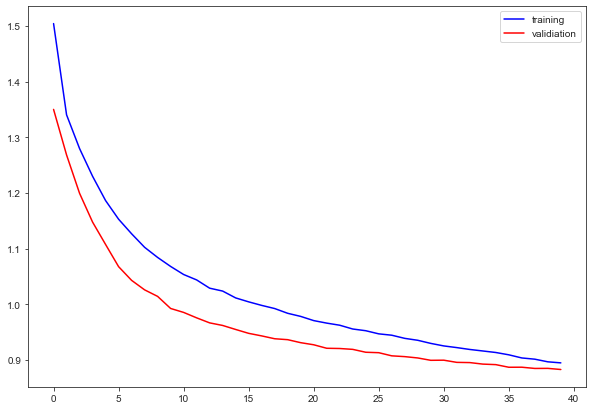

In [135]:
from tensorflow.keras.callbacks import EarlyStopping# Plot histoearly_stop = EarlyStopping(monitor='val_loss',patience=3)ry
import seaborn as sns

sns.set_style("ticks")
plt.figure(figsize=(10,7))
plt.plot(model_c.history.history['loss'],'b',label='training')
plt.plot(model_c.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [136]:
model_c.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=256)

Epoch 1/10
358/358 [==============================] - 440s 1s/step - loss: 0.8906 - acc: 0.6345 - val_loss: 0.8829 - val_acc: 0.6335
Epoch 2/10
358/358 [==============================] - 441s 1s/step - loss: 0.8876 - acc: 0.6363 - val_loss: 0.8804 - val_acc: 0.6350
Epoch 3/10
358/358 [==============================] - 439s 1s/step - loss: 0.8847 - acc: 0.6371 - val_loss: 0.8785 - val_acc: 0.6357
Epoch 4/10
358/358 [==============================] - 439s 1s/step - loss: 0.8830 - acc: 0.6378 - val_loss: 0.8776 - val_acc: 0.6367
Epoch 5/10
358/358 [==============================] - 439s 1s/step - loss: 0.8751 - acc: 0.6422 - val_loss: 0.8735 - val_acc: 0.6397
Epoch 6/10
358/358 [==============================] - 439s 1s/step - loss: 0.8747 - acc: 0.6422 - val_loss: 0.8746 - val_acc: 0.6380
Epoch 7/10
358/358 [==============================] - 440s 1s/step - loss: 0.8742 - acc: 0.6415 - val_loss: 0.8733 - val_acc: 0.6398
Epoch 8/10
358/358 [==============================] - 439s 1s/step - 

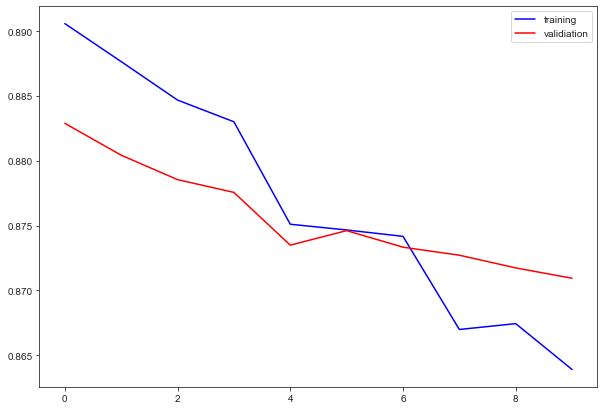

In [137]:
plt.figure(figsize=(10,7))
plt.plot(model_c.history.history['loss'],'b',label='training')
plt.plot(model_c.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [138]:
model_c.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=256)

Epoch 1/20
358/358 [==============================] - 438s 1s/step - loss: 0.8596 - acc: 0.6473 - val_loss: 0.8698 - val_acc: 0.6400
Epoch 2/20
358/358 [==============================] - 439s 1s/step - loss: 0.8570 - acc: 0.6507 - val_loss: 0.8683 - val_acc: 0.6413
Epoch 3/20
358/358 [==============================] - 435s 1s/step - loss: 0.8510 - acc: 0.6528 - val_loss: 0.8667 - val_acc: 0.6419
Epoch 4/20
358/358 [==============================] - 433s 1s/step - loss: 0.8492 - acc: 0.6547 - val_loss: 0.8674 - val_acc: 0.6399
Epoch 5/20
358/358 [==============================] - 433s 1s/step - loss: 0.8485 - acc: 0.6549 - val_loss: 0.8676 - val_acc: 0.6392
Epoch 6/20
358/358 [==============================] - 433s 1s/step - loss: 0.8438 - acc: 0.6558 - val_loss: 0.8663 - val_acc: 0.6406
Epoch 7/20
358/358 [==============================] - 434s 1s/step - loss: 0.8397 - acc: 0.6578 - val_loss: 0.8635 - val_acc: 0.6431
Epoch 8/20
358/358 [==============================] - 433s 1s/step - 

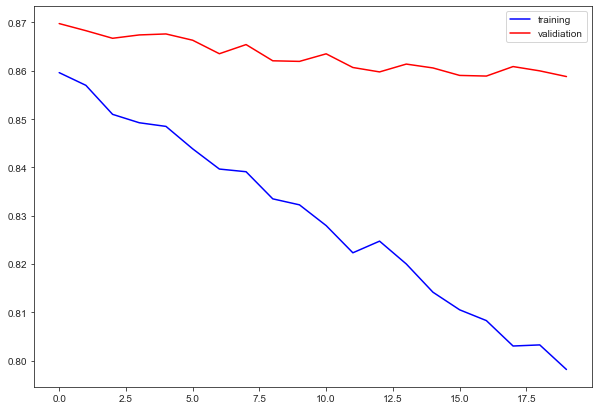

In [139]:
plt.figure(figsize=(10,7))
plt.plot(model_c.history.history['loss'],'b',label='training')
plt.plot(model_c.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:

#y_new=model_c.predict_classes(X_test, verbose = 1)

predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis=1)


Confusion matrix, without normalization
[[ 3884     0     0     0     0]
 [14374     0     0     0     0]
 [12170     0     0     0     0]
 [27207     0     0     0     0]
 [ 9705     0     0     0     0]]


<Figure size 432x288 with 0 Axes>

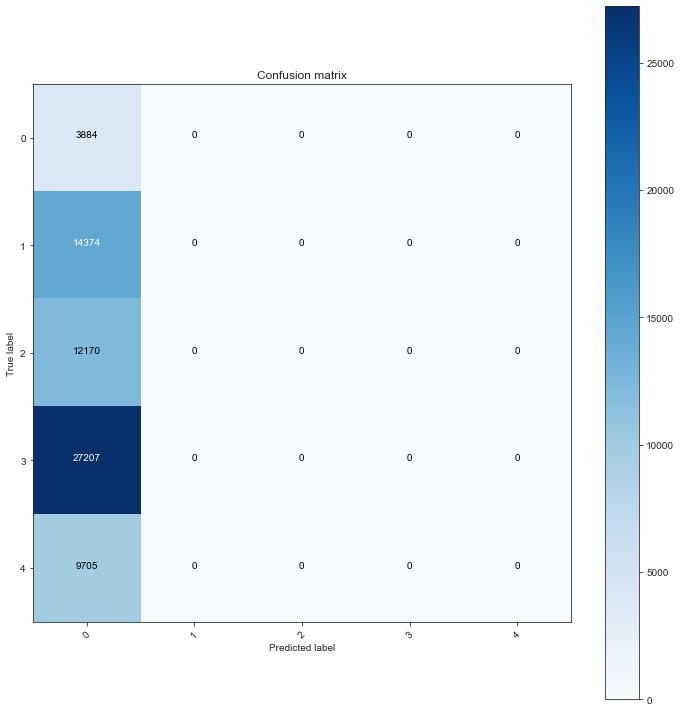

In [142]:
from sklearn.metrics import multilabel_confusion_matrix

# Turn matrix to percentages
#confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
conf=multilabel_confusion_matrix(y_test1, y_new)
cnf_matrix = confusion_matrix(y_test1, y_new,labels=[0, 1, 2,3,4])

# Turn to dataframe
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2,3,4],title='Confusion matrix')

In [143]:
cnf_matrix

array([[ 3884,     0,     0,     0,     0],
       [14374,     0,     0,     0,     0],
       [12170,     0,     0,     0,     0],
       [27207,     0,     0,     0,     0],
       [ 9705,     0,     0,     0,     0]], dtype=int64)

In [144]:
conf

array([[[    0, 63456],
        [    0,  3884]],

       [[52966,     0],
        [14374,     0]],

       [[55170,     0],
        [12170,     0]],

       [[40133,     0],
        [27207,     0]],

       [[57635,     0],
        [ 9705,     0]]], dtype=int64)

## Using GloVe embedding

In [145]:
#!gdown 'https://drive.google.com/uc?id=1dW8efcnidzpFB3mEsokbksJpjADqV96A';
#!unzip GL_Preprocessed.zip

Reading the embedding matrix, dataset and labels.

In [146]:
import numpy as np

# Read word embeddings
embedding_matrix_GL = np.genfromtxt('GL_Preprocessed/GL_EmbeddingMatrix.txt')

# Read the padded text sequences. Uses numpy function that loads from a previously saved txt.
data = np.genfromtxt('GL_Preprocessed/GL_Padded.txt')
labels1 = np.genfromtxt('GL_Preprocessed/GL_Labels1.txt')
labels2 = np.genfromtxt('GL_Preprocessed/GL_Labels2.txt')

### Using high confidence levels

**Separating test and train sets.**

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,y_ct,y_cs = train_test_split(data, labels1,labels2, test_size=0.25,
                                                    random_state=250500683, 
                                                    stratify = labels1)

Removing low confidence levels from the train set.

In [148]:
X_train = X_train[np.logical_not(y_ct[:] <= 0.2)]
y_train = y_train[np.logical_not(y_ct[:] <= 0.2)]

In [149]:
X_train.shape

(125554, 200)

In [150]:
y_train.shape

(125554,)

####  KIM's Model

Finally using the tensorflow I will create the first Model (KIM)

In [151]:
# Filter sizes to use.
filter_sizes = (2,4,6,8,10)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(200, 300))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=200 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 300)]   0           []                               
                                                                                                  
 conv1d_15 (Conv1D)             (None, 199, 128)     76928       ['input_3[0][0]']                
                                                                                                  
 conv1d_16 (Conv1D)             (None, 197, 128)     153728      ['input_3[0][0]']                
                                                                                                  
 conv1d_17 (Conv1D)             (None, 195, 128)     230528      ['input_3[0][0]']                
                                                                                         

In [152]:
from tensorflow.keras import optimizers

# Final model
model = Sequential()
embedding_layer = Embedding(len(embedding_matrix_GL),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_GL],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model.add(embedding_layer)

# Now we add our graph model
model.add(graph)
model.add(Dropout(0.5))

# Add a few layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# optimizer=optimizers.Adam(learning_rate=0.00001),
#adam = Adam(clipnorm=.1)
sgd = optimizers.SGD(learning_rate=0.01, clipnorm=1.)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc']) 

In [153]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [154]:
model.fit(X_train, y_train, validation_split=0.33, epochs=40, batch_size=256,callbacks=[early_stop])

Epoch 1/40
329/329 [==============================] - 431s 1s/step - loss: 0.6643 - acc: 0.6421 - val_loss: 0.6236 - val_acc: 0.6685
Epoch 2/40
329/329 [==============================] - 433s 1s/step - loss: 0.6147 - acc: 0.6708 - val_loss: 0.5912 - val_acc: 0.6781
Epoch 3/40
329/329 [==============================] - 420s 1s/step - loss: 0.5854 - acc: 0.6881 - val_loss: 0.5389 - val_acc: 0.7271
Epoch 4/40
329/329 [==============================] - 405s 1s/step - loss: 0.5502 - acc: 0.7103 - val_loss: 0.4912 - val_acc: 0.7668
Epoch 5/40
329/329 [==============================] - 415s 1s/step - loss: 0.5193 - acc: 0.7315 - val_loss: 0.4612 - val_acc: 0.7866
Epoch 6/40
329/329 [==============================] - 400s 1s/step - loss: 0.4936 - acc: 0.7508 - val_loss: 0.4454 - val_acc: 0.7949
Epoch 7/40
329/329 [==============================] - 431s 1s/step - loss: 0.4776 - acc: 0.7614 - val_loss: 0.4314 - val_acc: 0.8016
Epoch 8/40
329/329 [==============================] - 409s 1s/step - 

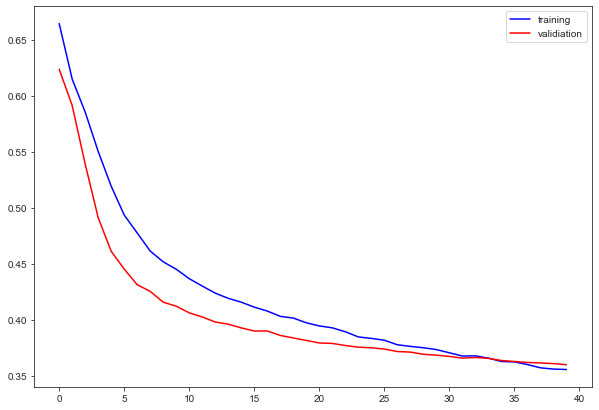

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(model.history.history['loss'],'b',label='training')
plt.plot(model.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [156]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns


In [157]:
# Calculate outputs in test set
prob_test = model.predict(X_test, verbose = 1)
prob_train = model.predict(X_train, verbose = 1)

3924/3924 [==============================] - 193s 49ms/step


In [158]:
#y_new=model.predict_classes(X_test, verbose = 1)
predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis=1)

In [159]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

#sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        ##rc={"lines.linewidth": 2, 'grid.linestyle': '--'})



AUC train:  0.9198651126545957
AUC test:  0.8741912614842595


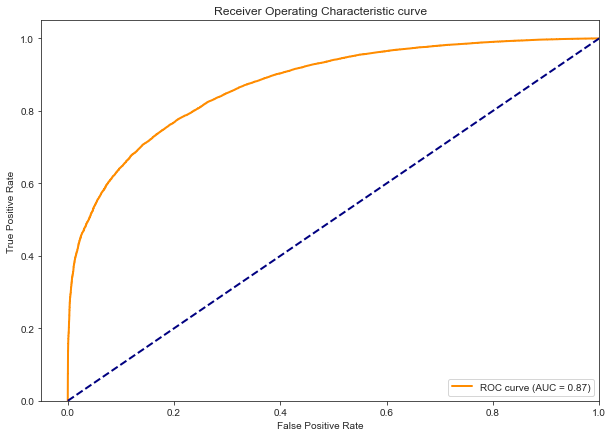

In [160]:
lw = 2
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [161]:
from sklearn.metrics import confusion_matrix
import pandas as pd
conf_mat = confusion_matrix(y_test, y_new)

In [162]:
# Turn matrix to percentages
confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xg, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

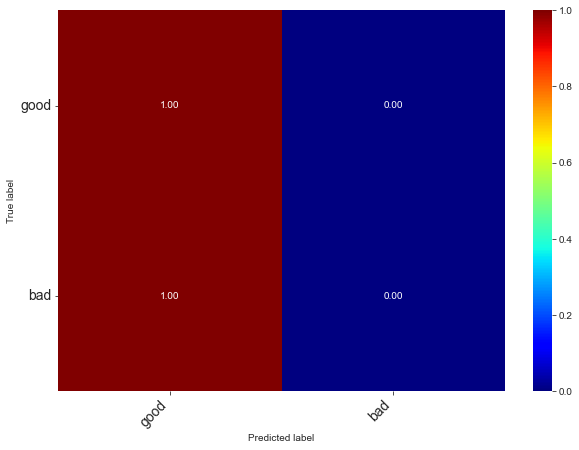

0.2910320493972361
51015
[[14847     0]
 [36168     0]]


In [163]:
# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f',cmap ='jet')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()
print((conf_mat[1,1]+conf_mat[0,0])/(conf_mat.sum()))
print(conf_mat.sum())
print(conf_mat)

#### J_model

In [164]:
J_model = Sequential()
embedding_layer = Embedding(len(embedding_matrix_GL),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_GL],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

J_model.add(embedding_layer)
J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=2,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)             # What stride to use?
         )
J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=4,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1))  

J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=6,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1) ) 


J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=8,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)  )

J_model.add(Conv1D(filters=128,           # How many filters to calculate.
                 kernel_size=10,         # How many words to calculate per filter.
                 padding='valid',       # Add padding?
                 activation='relu',     # What activation to use?
                 strides=1)  )
J_model.add(MaxPooling1D(pool_size = 3))
# Flatten
J_model.add(Flatten())


# Dense Layer of size 128 with Dropout
J_model.add(Dense(128, activation = 'relu'))
J_model.add(Dropout(0.5))

# Output layer of size 1
J_model.add(Dense(1, activation = 'sigmoid'))
J_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 300)          29392500  
                                                                 
 conv1d_20 (Conv1D)          (None, 199, 128)          76928     
                                                                 
 conv1d_21 (Conv1D)          (None, 196, 128)          65664     
                                                                 
 conv1d_22 (Conv1D)          (None, 191, 128)          98432     
                                                                 
 conv1d_23 (Conv1D)          (None, 184, 128)          131200    
                                                                 
 conv1d_24 (Conv1D)          (None, 175, 128)          163968    
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 58, 128)         

In [165]:
# Use Adam as optimizer, with a binary_crossentropy error.
sgd = optimizers.SGD(learning_rate=0.01, clipnorm=1.)
J_model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])



In [166]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [167]:
J_model.fit(X_train, y_train, validation_split=0.33, epochs=40, batch_size=256, callbacks=[early_stop])

Epoch 1/40
329/329 [==============================] - 290s 878ms/step - loss: 0.6456 - acc: 0.6645 - val_loss: 0.6354 - val_acc: 0.6683
Epoch 2/40
329/329 [==============================] - 289s 880ms/step - loss: 0.6349 - acc: 0.6703 - val_loss: 0.6344 - val_acc: 0.6683
Epoch 3/40
329/329 [==============================] - 294s 894ms/step - loss: 0.6340 - acc: 0.6703 - val_loss: 0.6331 - val_acc: 0.6683
Epoch 4/40
329/329 [==============================] - 300s 912ms/step - loss: 0.6315 - acc: 0.6703 - val_loss: 0.6293 - val_acc: 0.6683
Epoch 5/40
329/329 [==============================] - 294s 893ms/step - loss: 0.6218 - acc: 0.6713 - val_loss: 0.6069 - val_acc: 0.6750
Epoch 6/40
329/329 [==============================] - 294s 894ms/step - loss: 0.5731 - acc: 0.6991 - val_loss: 0.5379 - val_acc: 0.7178
Epoch 7/40
329/329 [==============================] - 294s 893ms/step - loss: 0.5226 - acc: 0.7345 - val_loss: 0.5126 - val_acc: 0.7411
Epoch 8/40
329/329 [============================

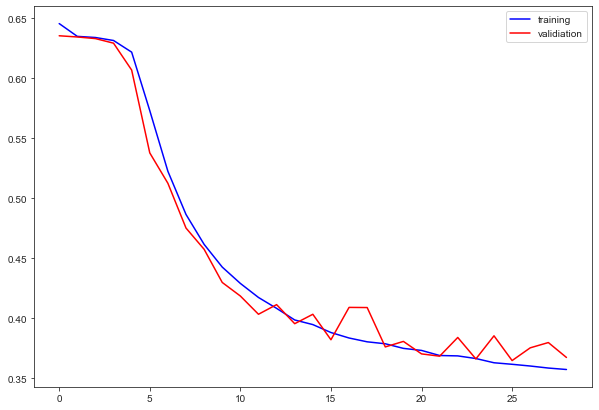

In [168]:
# Plot history
plt.figure(figsize=(10,7))
plt.plot(J_model.history.history['loss'],'b',label='training')
plt.plot(J_model.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [169]:
from sklearn.metrics import roc_curve, auc


In [170]:

# Calculate outputs in test set
prob_test = J_model.predict(X_test, verbose = 1)
prob_train = J_model.predict(X_train, verbose = 1)

3924/3924 [==============================] - 105s 27ms/step


In [171]:
#y_new=J_model.predict_classes(X_test, verbose = 1)
predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis = 1)



AUC train:  0.9111137463165293
AUC test:  0.8750942696310446


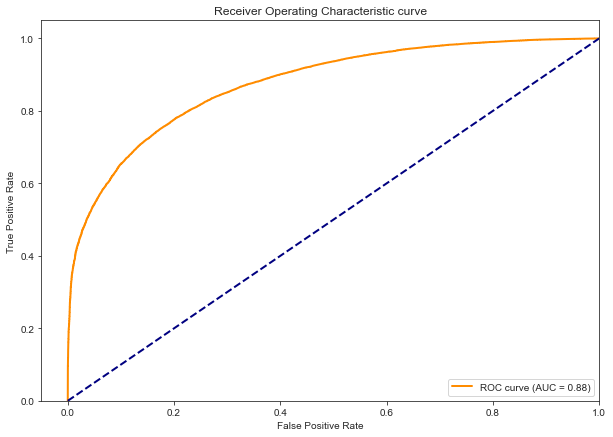

In [172]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

#sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
 #       rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [173]:
from sklearn.metrics import confusion_matrix

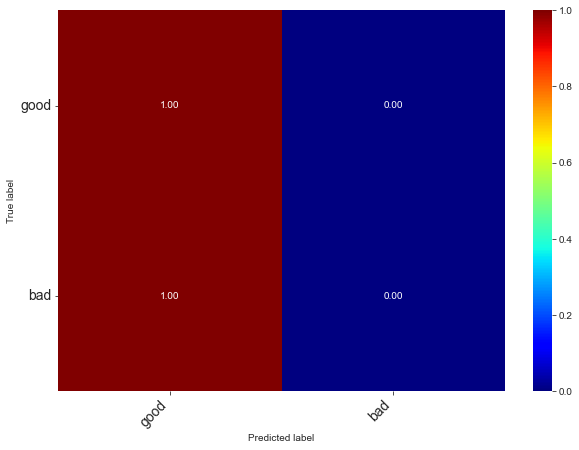

0.2910320493972361
51015
[[14847     0]
 [36168     0]]


In [174]:
conf_mat = confusion_matrix(y_test, y_new)

# Turn matrix to percentages
confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_xg, index=['good', 'bad'], columns=['good', 'bad'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f',cmap ='jet')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Plot!
plt.show()
print((conf_mat[1,1]+conf_mat[0,0])/(conf_mat.sum()))
print(conf_mat.sum())
print(conf_mat)

#### Classification model using Kim architecture 

In [175]:
import numpy as np
full_data['intensity'] = full_data['sentiment']*2-1
full_data['classify'] = full_data['intensity']*full_data['confidence']

In [316]:
# 0: Very Negative, 1: Negative, 2: Nutral, 3: Positive, 4: Very Positive

def classification(Y):
  if (Y <= -1.5):
    out = 0
  elif (-1.5<Y) and (Y<=-.2):
    out = 1
  elif (-.2<Y) and (Y<.2):
    out = 2
  elif (.2<=Y) and (Y<1.5):
    out =3
  else: 
    out =4
  return(out)
full_data['class'] = full_data['classify'].apply(lambda x: classification(x))

In [317]:
full_data

,text,sentiment,confidence,intensity,classify,class
0,trying wait patient lol,1,0.3,1,0.3,3
1,good morning fotopro team noticed comments upd...,1,0.6,1,0.6,3
2,still track ahead behind,1,0.2,1,0.2,3
3,update delivery,1,0.0,1,0.0,2
4,product nice twice,1,0.5,1,0.5,3
...,...,...,...,...,...,...
204053,curious looked working particle photon process...,1,0.7,1,0.7,3
204054,looking forward another awesome campaign kevin...,1,1.7,1,1.7,4
204055,nice thanks answers cheers,1,1.4,1,1.4,3
204056,wink still amazing less enthusiast plumduino w...,1,1.7,1,1.7,4


In [318]:
full_data['class']

0         3
1         3
2         3
3         2
4         3
         ..
204053    3
204054    4
204055    3
204056    4
204057    3
Name: class, Length: 204058, dtype: int64

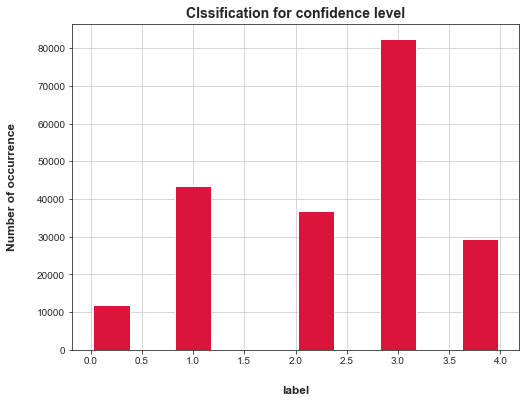

In [319]:
ax=full_data['class'].hist(figsize=(8,6),color='#DC143C', zorder=2, rwidth=0.9);
ax.set_title("Clssification for confidence level",weight='bold', size=14);
ax.set_xlabel("label", labelpad=20, weight='bold', size=12);
ax.set_ylabel("Number of occurrence", labelpad=20, weight='bold', size=12);

In [320]:
label_c=np.array(full_data['class'])

In [321]:
X_train, X_test, y_train1, y_test1 = train_test_split(data, label_c, test_size=0.33,
                                                    random_state=250500683, 
                                                    stratify = label_c)

In [322]:
from tensorflow.keras.utils import to_categorical

In [323]:
X_train.max()

97974.0

In [342]:
y_train1.max()

4

In [348]:
X_test.shape

(67340, 200)

In [343]:
y_test1.shape

(67340,)

In [346]:
X_train.shape

(136718, 200)

In [344]:
y_train1.shape

(136718,)

to_categorical converts integer labels to binary vectors, make sure your labels are integers, also use a softmax activation for categorical crossentropy, also, the to_categorical requires a second parameter, num_classes ,

In [330]:
y_test = to_categorical(y_test1, num_classes=5,dtype='float32')
y_train = to_categorical(y_train1,num_classes=5, dtype='float32')


In [331]:
# Filter sizes to use.
filter_sizes = (2,4,6,8,10)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(200, 300))
convs = []
avgs = []

In [332]:
# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                         padding='valid',
                         activation='relu',
                         strides=1)(graph_in) # Note the (graph_in). This means "put this layer AFTER the graph_in layer.
    pool = MaxPooling1D(pool_size=200 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 200, 300)]   0           []                               
                                                                                                  
 conv1d_35 (Conv1D)             (None, 199, 128)     76928       ['input_6[0][0]']                
                                                                                                  
 conv1d_36 (Conv1D)             (None, 197, 128)     153728      ['input_6[0][0]']                
                                                                                                  
 conv1d_37 (Conv1D)             (None, 195, 128)     230528      ['input_6[0][0]']                
                                                                                         

In [333]:
from tensorflow.keras import optimizers

# Final model
model_c = Sequential()
embedding_layer = Embedding(len(embedding_matrix_FT),           # Words in the embedding.
                            300,                           # Embedding dimension
                            weights=[embedding_matrix_FT],    # The weights we just calculated
                            input_length=200,              # The maximum number of words.
                            trainable=False)               # To NOT recalculate weights!

model_c.add(embedding_layer)

# Now we add our graph model
model_c.add(graph)
model_c.add(Dropout(0.5))

# Add a few layers
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.5))
model_c.add(Dense(5, activation='softmax'))
# optimizer=optimizers.Adam(learning_rate=0.00001),
#adam = Adam(clipnorm=.1)
sgd = optimizers.SGD(learning_rate=0.01, clipnorm=1.)
model_c.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [334]:
model_c.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 300)          29392500  
                                                                 
 graphModel (Functional)     (None, 640)               1152640   
                                                                 
 dropout_12 (Dropout)        (None, 640)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               82048     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 5)                 645       
                                                                 
Total params: 30,627,833
Trainable params: 1,235,333
N

In [335]:
model_c.fit(X_train, y_train, validation_split=0.33, epochs=60, batch_size=256)

Epoch 1/60
358/358 [==============================] - 517s 1s/step - loss: 1.4980 - acc: 0.3665 - val_loss: 1.3432 - val_acc: 0.4245
Epoch 2/60
358/358 [==============================] - 504s 1s/step - loss: 1.3384 - acc: 0.4189 - val_loss: 1.2526 - val_acc: 0.4925
Epoch 3/60
358/358 [==============================] - 545s 2s/step - loss: 1.2703 - acc: 0.4470 - val_loss: 1.1820 - val_acc: 0.5031
Epoch 4/60
358/358 [==============================] - 538s 2s/step - loss: 1.2149 - acc: 0.4722 - val_loss: 1.1263 - val_acc: 0.5366
Epoch 5/60
358/358 [==============================] - 509s 1s/step - loss: 1.1730 - acc: 0.4919 - val_loss: 1.0913 - val_acc: 0.5512
Epoch 6/60
358/358 [==============================] - 478s 1s/step - loss: 1.1430 - acc: 0.5085 - val_loss: 1.0595 - val_acc: 0.5678
Epoch 7/60
358/358 [==============================] - 462s 1s/step - loss: 1.1154 - acc: 0.5228 - val_loss: 1.0389 - val_acc: 0.5741
Epoch 8/60
358/358 [==============================] - 490s 1s/step - 

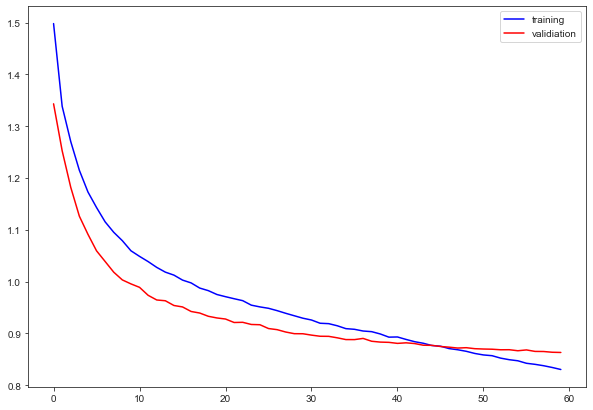

In [336]:
# Plot history
import seaborn as sns

plt.figure(figsize=(10,7))
plt.plot(model_c.history.history['loss'],'b',label='training')
plt.plot(model_c.history.history['val_loss'],'r',label='validiation')
plt.legend()
plt.show()

In [337]:
from sklearn.metrics import confusion_matrix
#y_new=model_c.predict_classes(X_test, verbose = 1)
predict_x=model.predict(X_test) 
y_new=np.argmax(predict_x,axis=1)


In [338]:
from sklearn.metrics import multilabel_confusion_matrix

In [339]:
# Turn matrix to percentages
#confusion_matrix_xg = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

conf=multilabel_confusion_matrix(y_test1, y_new)
cnf_matrix = confusion_matrix(y_test1, y_new,labels=[0, 1, 2,3,4])


In [340]:
# Turn to dataframe
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 3884     0     0     0     0]
 [14374     0     0     0     0]
 [12170     0     0     0     0]
 [27207     0     0     0     0]
 [ 9705     0     0     0     0]]


<Figure size 432x288 with 0 Axes>

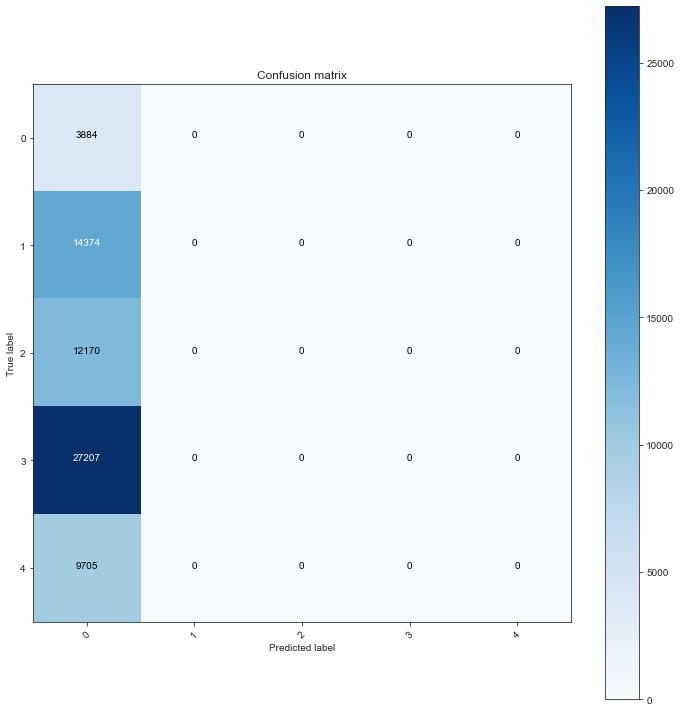

In [341]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2,3,4],title='Confusion matrix')